# Calculating the Accuracy of the Model

Using the same dataset, expand the model by including all other features into the regression. 

Moreover, calculate the accuracy of the model and create a confusion matrix

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [3]:
data = pd.read_csv('Bank_data.csv', index_col='Unnamed: 0')
data.describe(include='all')

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,NaN,NaN,NaN,NaN,NaN,259
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,NaN
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,NaN
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,NaN
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,NaN
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,NaN
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,NaN


In [4]:
data['y'], unique = pd.factorize(data['y'])

In [5]:
data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [6]:
x1 = data['duration']
y = data['y']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [7]:
x = sm.add_constant(x1)
reg = sm.Logit(y, x)
reg_results = reg.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


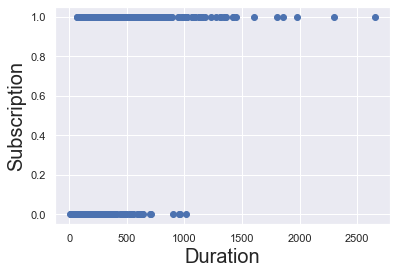

In [8]:
plt.scatter(x1, y)

plt.xlabel('Duration', fontsize=20)
plt.ylabel('Subscription', fontsize=20)

plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [9]:
new_x1 = data[['duration', 'interest_rate', 'march', 'credit', 'previous']]
new_x = sm.add_constant(new_x1)

In [10]:
new_reg = sm.Logit(y, new_x)
new_reg_results = new_reg.fit()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


### Confusion Matrix

Create the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [12]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [13]:
confusion_matrix(new_x, y, new_reg_results)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)